In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [21]:
def histogram(img_flattened):
    histList = {}
    for i in range(256):
        histList[i] = list(img_flattened).count(i)

    intensities = list(histList.keys())
    frequency = list(histList.values())
    
    return intensities, frequency, histList

def pdf(intensities, frequency, image):
    total_num_of_pixels = image.size
    normalized_frequency = [i/total_num_of_pixels for i in frequency]
    return intensities, normalized_frequency

def cdf(intensities, frequency):
    cdf_frequency = []
    sum = 0
    for i in range(len(frequency)):
        sum += frequency[i]
        cdf_frequency.append(sum)
        
    return intensities, cdf_frequency

def hist_equalization(frequency, intensity_multiplier):
    eq_frequency = [math.floor(i * intensity_multiplier) for i in frequency]
    return eq_frequency

# First Image

In [22]:
# Load an color image in grayscale
img = cv2.imread('chang.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_flattened = gray_img.flatten()

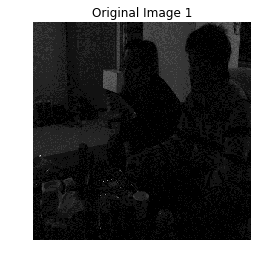

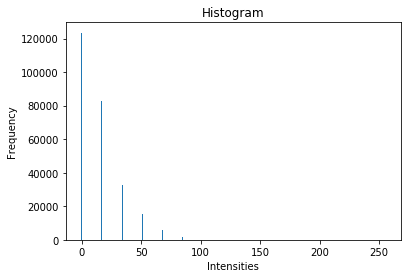

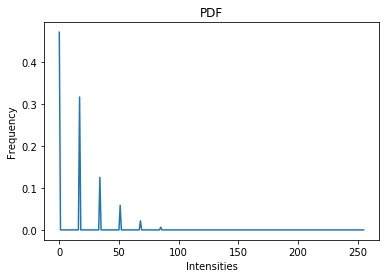

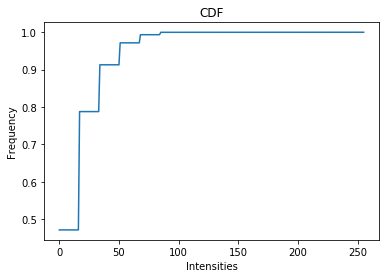

In [23]:
plt.imshow(gray_img)
plt.title('Original Image 1')
plt.axis('off')
plt.set_cmap('gray')
plt.show()

# Histogram
hist_intensities, hist_frequency, histList = histogram(img_flattened)
plt.bar(hist_intensities, hist_frequency)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('Histogram')
plt.show()


# PDF
pdf_intensities, pdf_normalized_frequency = pdf(hist_intensities, hist_frequency, gray_img)
plt.plot(pdf_normalized_frequency)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('PDF')
plt.show()


# CDF
cdf_intensities, cdf_frequency = cdf(pdf_intensities, pdf_normalized_frequency)
plt.plot(cdf_frequency)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('CDF')
plt.show()

# Equalization
eq_intensities1 = hist_equalization(cdf_frequency, 255)

# Second image

In [24]:
# Load an color image in grayscale
img2 = cv2.imread('Lenna.png')
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_flattened = gray_img2.flatten()

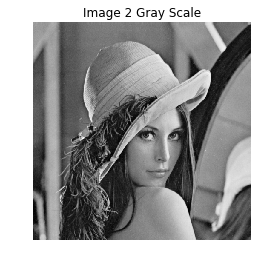

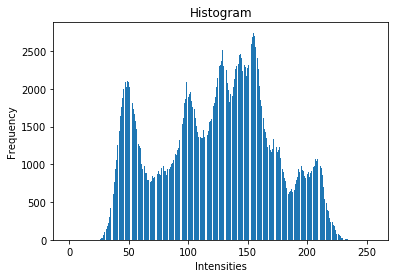

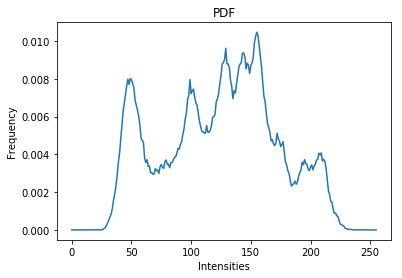

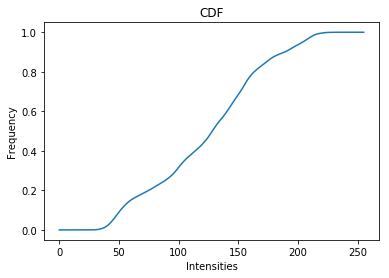

In [25]:
plt.imshow(gray_img2)
plt.title('Image 2 Gray Scale')
plt.axis('off')
plt.set_cmap('gray')
plt.show()

# Histogram
hist_intensities2, hist_frequency2, histList2 = histogram(img2_flattened)
plt.bar(hist_intensities2, hist_frequency2, align='center')
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('Histogram')
plt.show()


# PDF
pdf_intensities2, pdf_normalized_frequency2 = pdf(hist_intensities2, hist_frequency2, gray_img2)
plt.plot(pdf_normalized_frequency2)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('PDF')
plt.show()


# CDF
cdf_intensities2, cdf_frequency2 = cdf(pdf_intensities2, pdf_normalized_frequency2)
plt.plot(cdf_frequency2)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('CDF')
plt.show()

# Equalization
eq_intensities2 = hist_equalization(cdf_frequency2, 255)

# Histogram Matching

In [26]:
s1 = eq_intensities1
s2 = eq_intensities2
mapping = {}
for i in range(len(s1)):
    mapping[i] = 0

#Mapping logic
for i in range(len(s1)):
    for x in s2:
        if(x >= s1[i]):
            mapping[i] = s2.index(x)
            break

#s = []
#s = list(mapping.values())
#print(s)

In [27]:
# Final Mapping logic for mapping the new intensity values with pixel count.
#final_mapping ={}
#key_list= []
#histList = {0:8, 1:10, 2: 10, 3:2, 4:12, 5:16, 6:4, 7:2}
#for i in range(256):
#    key_list= []
#    if(i in mapping.values()):
#        for key, val in mapping.items():
#            if(val == i):
#                key_list.append(key)
#        sum = 0
#        for j in key_list:
#            sum += histList[j]
#        final_mapping[i] = sum
#    else:
#        final_mapping[i] = 0
            
#final_mapping


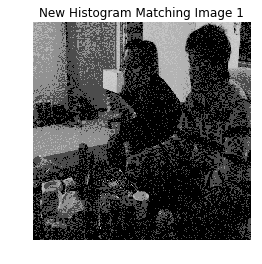

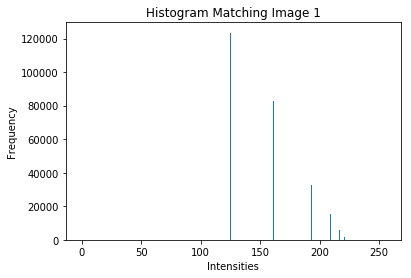

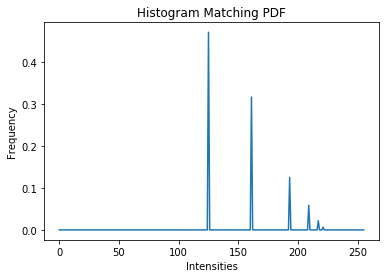

In [28]:
shape = gray_img.shape
new_image = np.zeros(shape)  # initialize with zeros

# map intensities to create new image
for i in range(0, shape[0]):
    for j in range(0, shape[1]):
        new_image[i, j] = list(mapping.values())[gray_img[i, j]]
        
# Histogram Matching New Image
plt.imshow(new_image)
plt.title('New Histogram Matching Image 1')
plt.axis('off')
plt.set_cmap('gray')
plt.show()

# Histogram
new_img_flattened = new_image.flatten()
hist_new_intensities, hist_new_frequency, new_histList = histogram(new_img_flattened)
plt.bar(hist_new_intensities, hist_new_frequency, align='center')
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('Histogram Matching Image 1')
plt.show()


# PDF.
pdf_new_intensities, pdf_new_normalized_frequency = pdf(hist_new_intensities, hist_new_frequency, new_image)
plt.plot(pdf_new_normalized_frequency)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('Histogram Matching PDF')
plt.show()


# CDF.
cdf_new_intensities, cdf_new_frequency = cdf(pdf_new_intensities, pdf_new_normalized_frequency)
plt.plot(cdf_new_frequency)
plt.ylabel('Frequency')
plt.xlabel('Intensities')
plt.title('Histogram Matching CDF')
plt.show()